[Список акций московской биржы](https://www.moex.com/msn/stock-instruments)

Должно получиться примерно 387 тикетов для анализа 

In [1]:
# !pip install matplotlib

In [2]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
pd.options.display.max_rows = 50
pd.options.display.max_columns = 70

In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
df_instr = pd.read_csv('../data/rates.csv', sep = ';', encoding = 'cp1251', header = 1)
df_instr = df_instr[['SECID','SHORTNAME', 'NAME', 'TYPENAME', 'ISIN','FACEVALUE', 'FACEUNIT', 'PRIMARY_BOARDID', 'EMITENTNAME', 'PRICE']]
print(df_instr.shape[0])
df_instr.head()

3175


,SECID,SHORTNAME,NAME,TYPENAME,ISIN,FACEVALUE,FACEUNIT,PRIMARY_BOARDID,EMITENTNAME,PRICE
0,AAL-RM,AmAirlines,American Airlines Group Inc.,Иностранные акции,US02376R1023,"0,01",USD,FQBR,American Airlines Group Inc.,"1648,77"
1,AAPL-RM,Apple,Apple Inc.,Иностранные акции,US0378331005,1e-05,USD,FQBR,Apple Inc,"9359,5"
2,ABBV-RM,AbbVie,AbbVie Inc.,Иностранные акции,US00287Y1091,"0,01",USD,FQBR,AbbVie Inc.,"8664,1"
3,ABRD,АбрауДюрсо,Абрау-Дюрсо ПАО ао,Акции обыкновенные,RU000A0JS5T7,"1,0",RUB,TQBR,"Публичное акционерное общество ""Абрау – Дюрсо""","196,891"
4,ABT-RM,Abbott,Abbott Laboratories,Иностранные акции,US0028241000,"0,0",USD,FQBR,Abbot Laboratories,"8768,16"


In [6]:
tickers_list = []
for inst in df_instr.SECID.tolist():
    if inst[-3:] == '-RM': 
        inst = inst[:-3]
    else: inst = inst +'.ME'
    tickers_list.append(inst)

In [7]:
# tickers_list = ['AAL', 'ABRD.ME', 'AKEU.ME']
tickers_str = ' '.join(tickers_list)
data = yf.Tickers(tickers_str)
data = data.history(period="1w", interval="1d")

[*********************100%***********************]  3175 of 3175 completed

2768 Failed downloads:
- RU000A101S40.ME: No data found, symbol may be delisted
- XS2038610445.ME: No data found, symbol may be delisted
- RU000A1007J6.ME: No data found, symbol may be delisted
- RU000A1027G0.ME: No data found, symbol may be delisted
- XS2242762651.ME: No data found, symbol may be delisted
- RU000A0ZZKS9.ME: No data found, symbol may be delisted
- RU000A102H83.ME: No data found, symbol may be delisted
- RU000A102DQ0.ME: No data found, symbol may be delisted
- RU000A0ZZL54.ME: No data found, symbol may be delisted
- RU000A0JXQ51.ME: No data found, symbol may be delisted
- RU000A1008Q9.ME: No data found, symbol may be delisted
- RU000A1027S5.ME: No data found, symbol may be delisted
- RU000A101WU4.ME: No data found, symbol may be delisted
- RU000A100048.ME: No data found, symbol may be delisted
- RU000A0JX2L4.ME: No data found, symbol may be delisted
- RU000A101JH8.ME: No data found, symbol may b

In [8]:
# Список доступных инструментов
tickers_list = data.transpose().loc['Volume'].dropna(how = 'all').index.to_list()

In [9]:
tickers_str = ' '.join(tickers_list)
data = yf.Tickers(tickers_str)
data = data.history(period="12mo", interval="1d",)

[*********************100%***********************]  407 of 407 completed


In [10]:
# Данные за год
df_in = data['Close']
df_in.head()

,AAL,AAPL,ABBV,ABRD.ME,ABT,ACKO.ME,ADBE,AFKS.ME,AFLT.ME,AGRO.ME,AKRN.ME,ALBK.ME,ALNU.ME,ALRS.ME,AMAT,AMD,AMEZ.ME,AMGN,AMZN,ANTM,APA,APTK.ME,AQUA.ME,ARSA.ME,ASSB.ME,ATVI,AVAN.ME,AVGO,BA,BABA,BANE.ME,BANEP.ME,BELU.ME,BIDU,BIIB,...,UPRO.ME,UPS,URKZ.ME,USBN.ME,UTAR.ME,UWGN.ME,V,VGSB.ME,VGSBP.ME,VJGZ.ME,VJGZP.ME,VLHZ.ME,VNT,VRSB.ME,VRSBP.ME,VRTX,VSMO.ME,VSYD.ME,VSYDP.ME,VTBR.ME,VTRS,VZ,VZRZP.ME,WMT,WTCM.ME,WTCMP.ME,XOM,YAKG.ME,YKEN.ME,YKENP.ME,YNDX.ME,YRSB.ME,YRSBP.ME,ZILL.ME,ZVEZ.ME
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-25,NaN,NaN,NaN,131.840698,NaN,5.061226,NaN,14.720160,60.047798,660.888245,5905.296387,54.5,48800.0,61.354839,NaN,NaN,4.170,NaN,NaN,NaN,NaN,13.6284,199.975662,3.119347,0.617317,NaN,727.452820,NaN,NaN,NaN,1700.161621,1305.454712,1336.010986,NaN,NaN,...,2.356454,NaN,11640.0,0.0698,6.55,242.000000,NaN,1.550,1.075,602.0,335.0,48.200001,NaN,46.744366,30.514460,NaN,18980.0,4090.969971,4180.0,0.034219,NaN,NaN,292.738983,NaN,8.649569,7.820212,NaN,39.695301,0.3670,0.3310,2960.600098,166.0,89.0,1465.0,4.525
2020-05-26,11.14,78.652542,86.340340,131.343185,88.157722,5.041533,376.630005,14.730086,60.749401,657.293274,5768.008301,55.0,49400.0,62.122971,54.691021,53.189999,4.165,216.289276,2421.860107,279.757904,12.616943,13.6833,204.376114,3.167337,0.744781,69.662704,732.115906,272.157684,144.729996,201.720001,1719.952881,1309.622437,1320.904175,108.360001,295.869995,...,2.373299,94.813507,10980.0,0.0687,6.55,243.699997,192.060501,1.750,1.080,601.0,328.0,48.099998,NaN,46.744366,32.936241,266.500000,18840.0,4061.679932,4120.0,0.034307,16.026119,52.010300,289.757935,121.913841,8.516789,7.820212,42.606403,39.794785,0.3535,0.3275,2913.199951,166.0,88.0,1420.0,4.490
2020-05-27,11.98,78.995224,85.645508,130.845673,89.418800,4.844598,375.170013,14.878975,63.556000,652.499878,5752.754395,55.5,49200.0,63.217564,55.940758,52.740002,4.255,218.633041,2410.389893,283.538391,12.487896,13.6343,196.553101,3.090553,0.748037,69.811981,727.452820,277.532928,149.520004,201.179993,1711.942139,1313.790283,1298.243896,108.220001,301.459991,...,2.373299,97.304237,11000.0,0.0698,6.60,242.699997,191.662903,1.680,1.060,598.0,326.0,48.500000,NaN,46.744366,31.967529,278.510010,18560.0,4090.969971,4200.0,0.034591,17.038921,52.814884,293.136444,120.555519,8.535758,7.763406,42.912659,40.043503,0.3490,0.3240,2826.000000,166.0,88.0,1430.0,4.505
2020-05-28,10.98,79.029984,85.693092,130.845673,90.739006,5.021839,379.829987,14.958383,64.616600,652.100403,5806.144043,55.5,48800.0,65.243523,54.224842,51.740002,4.120,217.971741,2401.100098,287.605164,11.783093,13.5636,199.975662,3.090553,0.711287,69.881645,718.126404,273.238586,149.820007,199.490005,1709.114746,1326.756836,1295.411499,106.320000,300.500000,...,2.399896,97.401909,11080.0,0.0703,6.59,242.600006,193.094254,1.695,1.110,598.0,327.0,48.299999,NaN,46.547966,31.483171,277.380005,19020.0,4042.149902,4120.0,0.035157,17.128286,53.370422,296.912415,121.746521,8.459885,7.725536,41.799011,39.595810,0.3500,0.3245,2888.000000,170.0,86.0,1425.0,4.460
2020-05-29,10.50,78.953018,88.205917,130.845673,93.517326,5.002146,386.600006,15.186679,63.686501,657.093506,5848.093262,59.0,49800.0,63.371193,55.722549,53.799999,4.100,223.388687,2442.370117,290.309753,10.711000,13.3733,200.953537,3.090553,0.729429,71.633163,708.800110,281.084198,145.850006,207.389999,1708.172363,1315.179565,1217.989014,106.550003,307.089996,...,2.426492,97.392136,10680.0,0.0700,6.54,242.399994,194.068390,1.655,1.110,598.0,330.0,48.700001,NaN,47.333584,31.483171,287.959991,18960.0,3944.510010,4120.0,0.035490,16.949556,54.960430,297.111176,122.110695,8.478853,7.858082,42.198063,39.894272,0.3505,0.3370,2833.199951,170.0,86.0,1440.0,4.475


## Удаление выбросов из данных

In [343]:
# Удаление выбросов из данных
def drop_blowout(df,dorp_tiket_list,  max = 40):
    df = df.drop(columns=dorp_tiket_list)
    tiket_blowout = df.columns[(df > max).max(axis = 0)]
    for tik in tiket_blowout:
#         print(tik)
#         print('Было')
#         print(df.loc[df[tik] > max, tik])
        blowout_index = (df.diff() > max).max(axis = 1)
#         print('Стало')
#         print(df[tik].shift().loc[blowout_index])
#         print('='*50)
        df[tik].loc[blowout_index] = df[tik].shift().loc[blowout_index]
#         df.loc[blowout_df.loc[blowout_df[tik] > max, tik].index] = df[[tik]].shift().loc[blowout_df.loc[blowout_df[tik] > max, tik].index]
    return df
    

In [344]:
# Все выбросы в данных
median = data['Close'].median()
df = data['Close'] / median
# df_clean = df
df_clean = drop_blowout(df, ['RUSE.ME'])

In [278]:
# Проверка максимальных перепадов
df_clean.max().sort_values(ascending = False)[:5]

VJGZ.ME     4.731411
BELU.ME     4.632736
MOBB.ME     3.925501
KZOSP.ME    3.621757
VJGZP.ME    3.514986
dtype: float64

<AxesSubplot:xlabel='Date'>

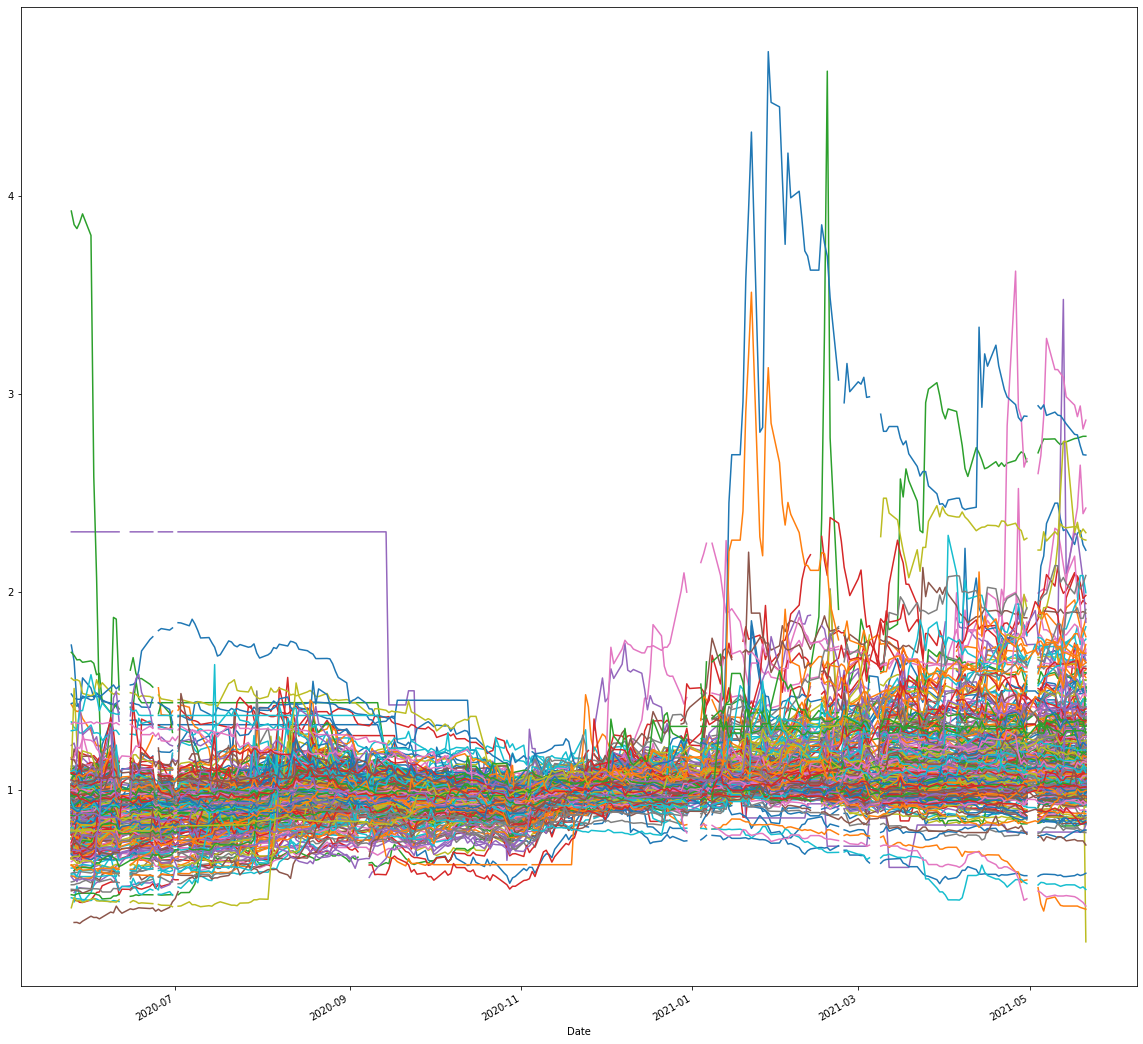

In [14]:
# norm_col = gr_.max() < 50
df_clean.plot(legend = False, figsize=(20, 20))

<AxesSubplot:xlabel='Date'>

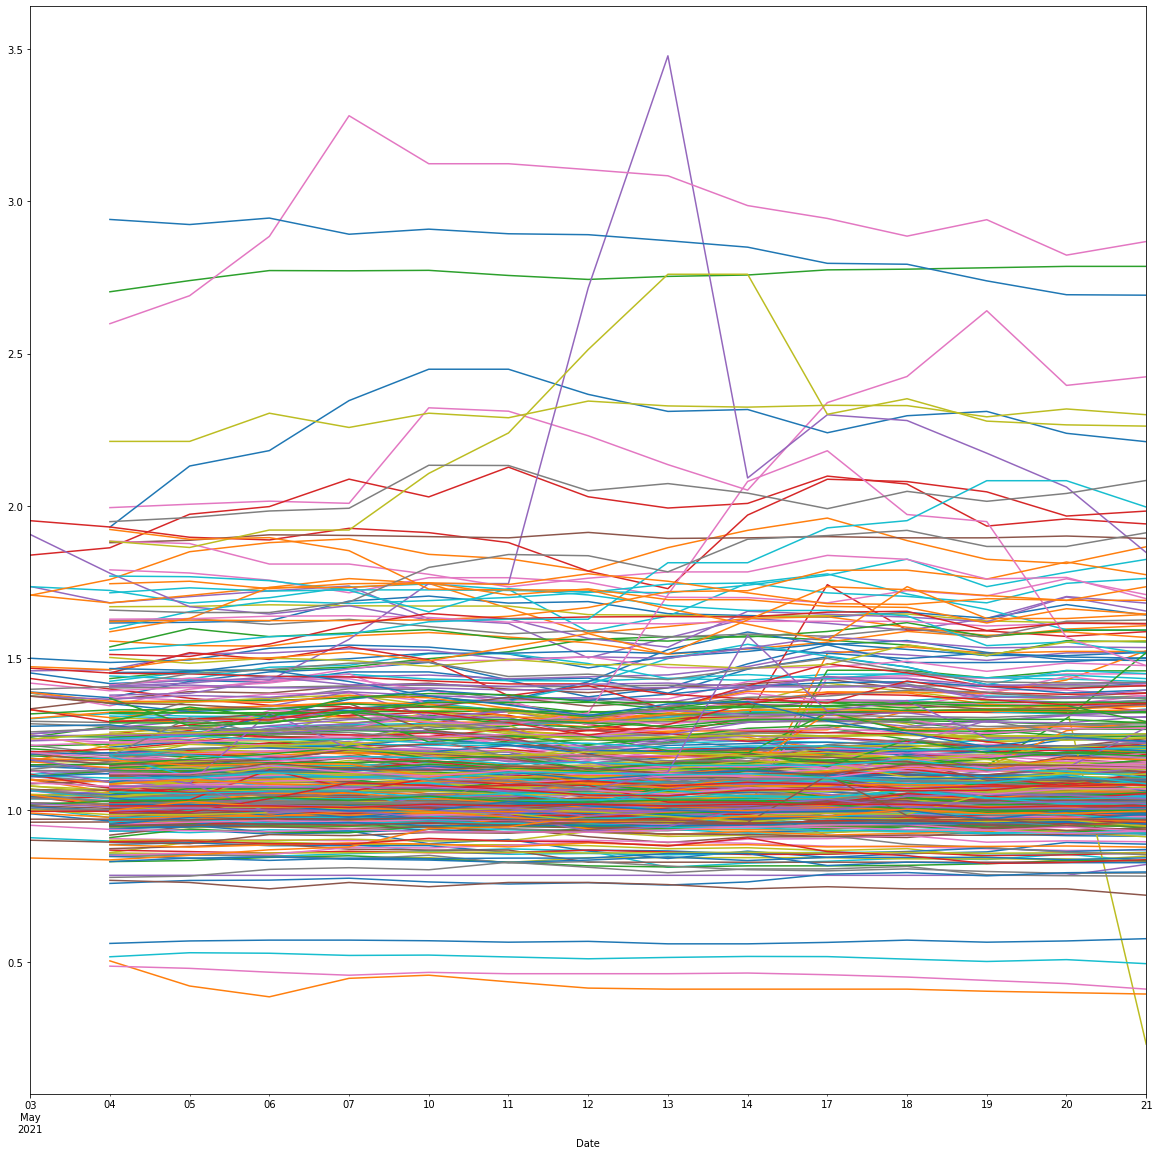

In [15]:
df_clean.loc[df_clean.index > '2021-05-01'].plot(legend = False, figsize=(20, 20))

## Разделение приудов на строки

In [22]:
df_len = df_clean
df_len = df_len.transpose().loc[['AAL', 'AAPL']]
df_len.head()

Date,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,...,2021-04-05,2021-04-06,2021-04-07,2021-04-08,2021-04-09,2021-04-12,2021-04-13,2021-04-14,2021-04-15,2021-04-16,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-03,2021-05-04,2021-05-05,2021-05-06,2021-05-07,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21
AAL,NaN,0.736286,0.791804,0.725710,0.693985,0.734303,0.741573,0.783212,1.105089,1.228685,1.342366,1.226041,1.124917,0.950430,1.106411,1.103767,1.125578,1.122274,1.089888,1.057502,0.986120,0.925314,0.861864,0.870456,0.818242,0.880370,0.863847,0.846662,0.826173,NaN,0.846001,0.787178,0.792465,0.738929,0.789161,...,1.601454,1.590218,1.581626,1.563120,1.555849,1.514210,1.491077,1.478520,1.462657,1.456048,1.424322,1.346332,1.388632,1.326504,1.395241,1.456709,1.438202,1.434237,1.407799,1.435558,1.450760,1.415730,1.425644,1.420357,1.454065,1.454065,1.425644,1.372108,1.401851,1.480502,1.543291,1.557171,1.518176,1.493721,1.491738
AAPL,NaN,0.653664,0.656512,0.656801,0.656161,0.664231,0.667306,0.670979,0.665201,0.684146,0.688191,0.709923,0.728188,0.693227,0.699212,0.707859,0.726619,0.725608,0.725897,0.721749,0.740632,0.756441,0.743088,0.752953,0.729818,0.746638,0.752870,0.751446,0.751446,NaN,0.771548,0.769154,0.787067,0.790452,0.791835,...,1.044553,1.047125,1.061147,1.081556,1.103460,1.088858,1.115324,1.095412,1.115905,1.113084,1.118726,1.104372,1.107608,1.094665,1.114411,1.117730,1.114992,1.108272,1.107442,1.090683,1.099643,1.060732,1.062806,1.076413,1.082147,1.054223,1.046411,1.020315,1.038598,1.059209,1.049402,1.037601,1.036271,1.058046,1.042421


### Формируем мультииндексы

In [229]:
col_names = [[ticker,date] for ticker in df_clean.columns for date in [df_clean.index.max()]]

In [315]:
df_len_2= df_clean
df_len_2['dt'] = df_clean.index.max()
df_len_2 = df_len_2.set_index('dt', append=True).unstack('dt')
df_len_2.index = range(0, len(df_len_2.index))
df_len_2

,AAL,AAPL,ABBV,ABRD.ME,ABT,ACKO.ME,ADBE,AFKS.ME,AFLT.ME,AGRO.ME,AKRN.ME,ALBK.ME,ALNU.ME,ALRS.ME,AMAT,AMD,AMEZ.ME,AMGN,AMZN,ANTM,APA,APTK.ME,AQUA.ME,ARSA.ME,ASSB.ME,ATVI,AVAN.ME,AVGO,BA,BABA,BANE.ME,BANEP.ME,BELU.ME,BIDU,BIIB,...,UPRO.ME,UPS,URKZ.ME,USBN.ME,UTAR.ME,UWGN.ME,V,VGSB.ME,VGSBP.ME,VJGZ.ME,VJGZP.ME,VLHZ.ME,VNT,VRSB.ME,VRSBP.ME,VRTX,VSMO.ME,VSYD.ME,VSYDP.ME,VTBR.ME,VTRS,VZ,VZRZP.ME,WMT,WTCM.ME,WTCMP.ME,XOM,YAKG.ME,YKEN.ME,YKENP.ME,YNDX.ME,YRSB.ME,YRSBP.ME,ZILL.ME,ZVEZ.ME
dt,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,...,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21,2021-05-21
0,NaN,NaN,NaN,0.655932,NaN,0.969584,NaN,0.519312,0.868119,0.823230,0.984216,0.939655,0.853147,0.705755,NaN,NaN,0.841574,NaN,NaN,NaN,NaN,1.005786,0.829775,0.816583,0.783148,NaN,0.786389,NaN,NaN,NaN,1.013962,1.049612,1.023080,NaN,NaN,...,0.900139,NaN,0.717633,1.013062,0.944485,1.332232,NaN,0.403121,0.572570,0.913505,0.912807,0.869644,NaN,0.693537,0.693510,NaN,0.960040,1.015129,1.024510,0.922448,NaN,NaN,1.022848,NaN,0.997812,0.995181,NaN,0.790882,0.941629,0.909341,0.619995,0.970760,0.986150,0.559694,1.050493
1,0.736286,0.653664,0.887050,0.653457,0.818858,0.965811,0.795518,0.519662,0.878262,0.818752,0.961335,0.948276,0.863636,0.714591,0.714218,0.650244,0.840565,0.920720,0.765278,0.940783,0.856132,1.009838,0.848034,0.829146,0.944853,0.842055,0.791430,0.721629,0.715069,0.795050,1.025766,1.052963,1.011512,0.757444,1.086399,...,0.906573,0.590847,0.676942,0.997097,0.944485,1.341591,0.934685,0.455137,0.575233,0.911988,0.893733,0.867839,NaN,0.693537,0.748551,1.161828,0.952959,1.007861,1.009804,0.924819,1.007491,0.913858,1.012432,0.879208,0.982494,0.995181,1.026610,0.792864,0.906992,0.899725,0.610069,0.970760,0.975069,0.542502,1.042368
2,0.791804,0.656512,0.879911,0.650982,0.830571,0.928084,0.792434,0.524915,0.918838,0.812781,0.958792,0.956897,0.860140,0.727182,0.730539,0.644743,0.858729,0.930698,0.761654,0.953496,0.847375,1.006221,0.815573,0.809045,0.948985,0.843859,0.786389,0.735882,0.738735,0.792921,1.020988,1.056314,0.994159,0.756466,1.106925,...,0.906573,0.606369,0.678175,1.013062,0.951694,1.336086,0.932750,0.436931,0.564581,0.907436,0.888283,0.875056,NaN,0.693537,0.726535,1.214186,0.938796,1.015129,1.029412,0.932460,1.071161,0.927996,1.024236,0.869412,0.984683,0.987952,1.033989,0.797820,0.895446,0.890110,0.591808,0.970760,0.975069,0.546323,1.045850
3,0.725710,0.656801,0.880400,0.650982,0.842834,0.962038,0.802277,0.527716,0.934171,0.812283,0.967691,0.956897,0.853147,0.750486,0.708130,0.632518,0.831483,0.927882,0.758718,0.967172,0.799551,1.001004,0.829775,0.809045,0.902362,0.844701,0.776307,0.724495,0.740217,0.786260,1.019302,1.066739,0.991990,0.743185,1.103400,...,0.916733,0.606977,0.683107,1.020319,0.950252,1.335535,0.939716,0.440832,0.591212,0.907436,0.891008,0.871448,NaN,0.690623,0.715527,1.209260,0.962064,1.003015,1.009804,0.947742,1.076779,0.937757,1.037430,0.878001,0.975930,0.983133,1.007156,0.788900,0.898012,0.891484,0.604791,0.994152,0.952909,0.544413,1.035403
4,0.693985,0.656161,0.906216,0.650982,0.868641,0.958266,0.816577,0.535770,0.920724,0.818503,0.974682,1.017241,0.870629,0.728949,0.727689,0.657702,0.827447,0.950942,0.771759,0.976267,0.726803,0.986959,0.833832,0.809045,0.925378,0.865873,0.766225,0.745298,0.720603,0.817397,1.018740,1.057431,0.932702,0.744792,1.127598,...,0.926892,0.606

In [405]:
df_len_2_ = df_len_2.copy()
for tiket in df_clean.columns:
    for n in range(-1, -10, -1): 
        df_len_2_[(tiket, df_clean.index[n-1])] = df_len_2_[(tiket, df_clean.index[n])].shift()
df_len_2_ = df_len_2_.sort_index(axis=1)
df_len_2_ = df_len_2_.fillna(method = 'backfill')
df_len_2_

AAL                                                         \
dt  2021-05-10 2021-05-11 2021-05-12 2021-05-13 2021-05-14 2021-05-17   
0     0.736286   0.736286   0.736286   0.736286   0.736286   0.736286   
1     0.736286   0.736286   0.736286   0.736286   0.736286   0.736286   
2     0.736286   0.736286   0.736286   0.736286   0.736286   0.736286   
3     0.736286   0.736286   0.736286   0.736286   0.736286   0.736286   
4     0.736286   0.736286   0.736286   0.736286   0.736286   0.736286   
..         ...        ...        ...        ...        ...        ...   
254   1.415730   1.425644   1.420357   1.454065   1.454065   1.425644   
255   1.425644   1.420357   1.454065   1.454065   1.425644   1.372108   
256   1.420357   1.454065   1.454065   1.425644   1.372108   1.401851   
257   1.454065   1.454065   1.425644   1.372108   1.401851   1.480502   
258   1.454065   1.425644   1.372108   1.401851   1.480502   1.543291   

                                                      AAPL             \
dt  2021-05-18 2021-05-19 2021-05-20 2021-05-21 2021-05-10 2021-05-11   
0     0.736286   0.736286   0.736286   0.736286   0.653664   0.653664   
1     0.736286   0.736286   0.736286   0.736286   0.653664   0.653664   
2     0.736286   0.736286   0.736286   0.791804   0.653664   0.653664   
3     0.736286   0.736286   0.791804   0.725710   0.653664   0.653664   
4     0.736286   0.791804   0.725710   0.693985   0.653664   0.653664   
..         ...        ...        ...        ...        ...        ...   
254   1.372108   1.401851   1.480502   1.543291   1.060732   1.062806   
255   1.401851   1.480502   1.543291   1.557171   1.062806   1.076413   
256   1.480502   1.543291   1.557171   1.518176   1.076413   1.082147   
257   1.543291   1.557171   1.518176   1.493721   1.082147   1.054223   
258   1.557171   1.518176   1.493721   1.491738   1.054223   1.046411   

                                                                       \
dt  2021-05-12 2021-05-13 2021-05-14 2021-05-17 2021-05-18 2021-05-19   
0     0.653664   0.653664   0.653664   0.653664   0.653664   0.653664   
1     0.653664   0.653664   0.653664   0.653664   0.653664   0.653664   
2     0.653664   0.653664   0.653664   0.653664   0.653664   0.653664   
3     0.653664   0.653664   0.653664   0.653664   0.653664   0.653664   
4     0.653664   0.653664   0.653664   0.653664   0.653664   0.656512   
..         ...        ...        ...        ...        ...        ...   
254   1.076413   1.082147   1.054223   1.046411   1.020315   1.038598   
255   1.082147   1.054223   1.046411   1.020315   1.038598   1.059209   
256   1.054223   1.046411   1.020315   1.038598   1.059209   1.049402   
257   1.046411   1.020315   1.038598   1.059209   1.049402   1.037601   
258   1.020315   1.038598   1.059209   1.049402   1.037601   1.036271   

                                ABBV                                   \
dt  2021-05-20 2021-05-21 2021-05-10 2021-05-11 2021-05-12 2021-05-13   
0     0.653664   0.653664   0.887050   0.887050   0.887050   0.887050   
1     0.653664   0.653664   0.887050   0.887050   0.887050   0.887050   
2     0.653664   0.656512   0.887050   0.887050   0.887050   0.887050   
3     0.656512   0.656801   0.887050   0.887050   0.887050   0.887050   
4     0.656801   0.656161   0.887050   0.887050   0.887050   0.887050   
..         ...        ...        ...        ...        ...        ...   
254   1.059209   1.049402   1.170194   1.189509   1.192591   1.189201   
255   1.049402   1.037601   1.189509   1.192591   1.189201   1.194029   
256   1.037601   1.036271   1.192591   1.189201   1.194029   1.180365   
257   1.036271   1.058046   1.189201   1.194029   1.180365   1.181084   
258   1.058046   1.042421   1.194029   1.180365   1.181084   1.197933   

                                                                       \
dt  2021-05-14 2021-05-17 2021-05-18 2021-05-19 2021-05-20 2021-05-21   
0     0.887050   0.887050   0.887050   0.887050   0.887050   0.88

In [415]:
df_len_2_.loc(axis =1)[df_len_2_.isna().max()]

BSPBP.ME                                                         \
dt  2021-05-10 2021-05-11 2021-05-12 2021-05-13 2021-05-14 2021-05-17   
0          NaN        NaN        NaN        NaN        NaN        NaN   
1          NaN        NaN        NaN        NaN        NaN        NaN   
2          NaN        NaN        NaN        NaN        NaN        NaN   
3          NaN        NaN        NaN        NaN        NaN        NaN   
4          NaN        NaN        NaN        NaN        NaN        NaN   
..         ...        ...        ...        ...        ...        ...   
254        NaN        NaN        NaN        NaN        NaN        NaN   
255        NaN        NaN        NaN        NaN        NaN        NaN   
256        NaN        NaN        NaN        NaN        NaN        NaN   
257        NaN        NaN        NaN        NaN        NaN        NaN   
258        NaN        NaN        NaN        NaN        NaN        NaN   

                                        FIXP.ME                        \
dt  2021-05-18 2021-05-19 2021-05-20 2021-05-10 2021-05-11 2021-05-12   
0          NaN        NaN        NaN        NaN        NaN        NaN   
1          NaN        NaN        NaN        NaN        NaN        NaN   
2          NaN        NaN        NaN        NaN        NaN        NaN   
3          NaN        NaN        NaN        NaN        NaN        NaN   
4          NaN        NaN        NaN        NaN        NaN        NaN   
..         ...        ...        ...        ...        ...        ...   
254        NaN        NaN        NaN        NaN        NaN        NaN   
255        NaN        NaN        NaN        NaN        NaN        NaN   
256        NaN        NaN        NaN        NaN        NaN        NaN   
257        NaN        NaN        NaN        NaN        NaN        NaN   
258        NaN        NaN        NaN        NaN        NaN        NaN   

                                                                       \
dt  2021-05-13 2021-05-14 2021-05-17 2021-05-18 2021-05-19 2021-05-20   
0          NaN        NaN        NaN        NaN        NaN        NaN   
1          NaN        NaN        NaN        NaN        NaN        NaN   
2          NaN        NaN        NaN        NaN        NaN        NaN   
3          NaN        NaN        NaN        NaN        NaN        NaN   
4          NaN        NaN        NaN        NaN        NaN        NaN   
..         ...        ...        ...        ...        ...        ...   
254        NaN        NaN        NaN        NaN        NaN        NaN   
255        NaN        NaN        NaN        NaN        NaN        NaN   
256        NaN        NaN        NaN        NaN        NaN        NaN   
257        NaN        NaN        NaN        NaN        NaN        NaN   
258        NaN        NaN        NaN        NaN        NaN        NaN   

       FLOT.ME                                                         \
dt  2021-05-10 2021-05-11 2021-05-12 2021-05-13 2021-05-14 2021-05-17   
0          NaN        NaN        NaN        NaN        NaN        NaN   
1          NaN        NaN        NaN        NaN        NaN        NaN   
2          NaN        NaN        NaN        NaN        NaN        NaN   
3          NaN        NaN        NaN        NaN        NaN        NaN   
4          NaN        NaN        NaN        NaN        NaN        NaN   
..         ...        ...        ...        ...        ...        ...   
254        NaN        NaN        NaN        NaN        NaN        NaN   
255        NaN        NaN        NaN        NaN        NaN        NaN   
256        NaN        NaN        NaN        NaN        NaN        NaN   
257        NaN        NaN        NaN        NaN        NaN        NaN   
258        NaN        NaN        NaN        NaN        NaN        NaN   

                                        FXDM.ME                        \
dt  2021-05-18 2021-05-19 2021-05-20 2021-05-10 2021-05-11 2021-05-12   
0          NaN        NaN        NaN        NaN        NaN  

In [406]:
X = df_len_2_.loc(axis = 1)[:, df_clean.index[:-1]].values
y = df_len_2_.loc(axis = 1)[:, df_clean.index[-1]].values

In [407]:
np.unique(np.isnan(X))

array([False,  True])

## Составление модели

In [402]:
from sklearn.linear_model import LinearRegression

In [403]:
reg = LinearRegression().fit(X, y)